In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf
#Fetch historical stock data
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2022-01-01")
print(data)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   73.059425   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.349136   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.925636   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.582664   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.750259   
...                ...         ...         ...         ...         ...   
2021-12-27  177.089996  180.419998  177.070007  180.330002  178.065628   
2021-12-28  180.160004  181.330002  178.529999  179.289993  177.038742   
2021-12-29  179.330002  180.630005  178.139999  179.380005  177.127594   
2021-12-30  179.470001  180.570007  178.089996  178.199997  175.962402   
2021-12-31  178.089996  179.229996  177.259995  177.570007  175.340317   

               Volume  
Date         

In [ ]:
# Prepare the data
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)
# Create sequences for training
seq_length = 20
X, y = [], []
for i in range(len(data_normalized) - seq_length):
    X.append(data_normalized[i:i + seq_length, 0])
    y.append(data_normalized[i + seq_length, 0])

X, y = np.array(X), np.array(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
13/13 [==============================] - 4s 19ms/step - loss: 0.1391
Epoch 2/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0137
Epoch 3/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0061
Epoch 4/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0034
Epoch 5/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0024
Epoch 6/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0020
Epoch 7/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0018
Epoch 8/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0020
Epoch 9/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0018
Epoch 10/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0018


In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error on Test Set:", loss)
# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
# Compare predictions with actual values
compare_df = pd.DataFrame({'Actual': scaler.inverse_transform(y_test.reshape(-1, 1)).flatten(),
                           'Predicted': predicted_stock_price.flatten()})
pd.set_option('display.max_rows', None)
print(compare_df)

4/4 [==============================] - 0s 7ms/step - loss: 0.0018
Mean Squared Error on Test Set: 0.0018492004601284862
4/4 [==============================] - 0s 7ms/step
        Actual   Predicted
0   142.830002  150.144958
1   171.139999  172.102081
2   115.980003  119.168930
3   150.440002  151.887253
4   148.970001  154.177399
5   134.179993  122.362724
6   147.059998  149.039520
7   125.889999  128.234360
8   180.330002  174.611496
9   131.970001  127.837669
10   81.217499   81.624825
11  116.970001  115.514580
12  176.279999  174.202682
13  127.449997  132.465439
14  122.720001  119.627769
15  141.509995  145.723724
16   80.834999   80.612793
17   60.552502   73.772263
18  165.300003  157.853592
19   88.209999   82.335426
20  143.160004  133.869492
21  175.639999  173.801865
22  132.029999  127.833076
23  163.759995  159.692993
24   61.195000   71.251274
25  117.320000  126.496086
26  169.750000  172.886520
27  179.449997  165.480789
28   79.212502   78.316811
29   77.852501   74

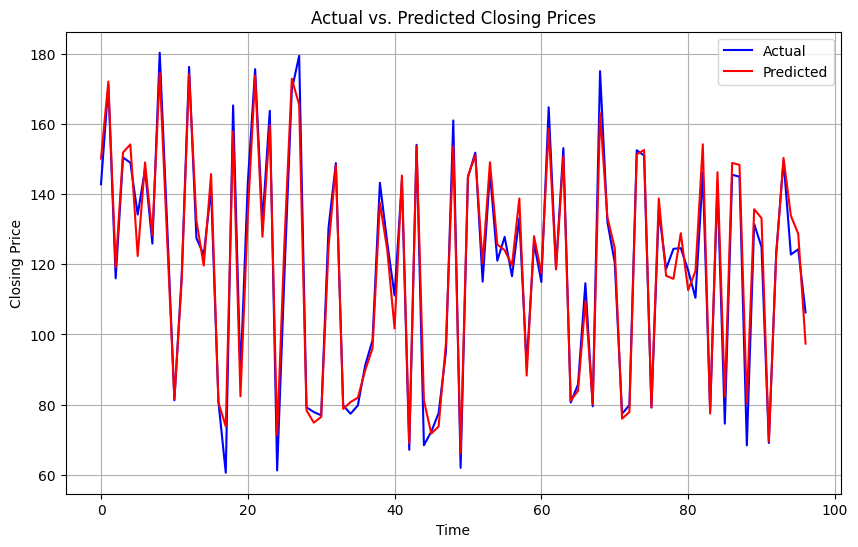

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(compare_df['Actual'], label='Actual', color='blue')
plt.plot(compare_df['Predicted'], label='Predicted', color='green')
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()